In [0]:
import pandas as pd
df = pd.read_csv('telco_dataset.csv')

In [2]:
df.head()

,phone number,international plan,voice mail plan,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,382-4657,0,1,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,371-7191,0,1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,358-1921,0,0,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,375-9999,1,0,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,330-6626,1,0,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

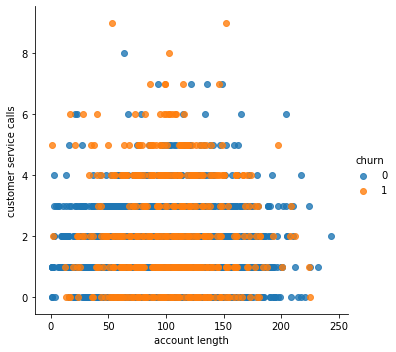

In [8]:
sns.lmplot(x='account length', y='customer service calls', data=df, fit_reg=False, hue='churn', legend=True)
#lmplot คือ plot แบบ scratter, data คือ ชื่อ dataframe ของเราที่จะ plot, fit_reg คือ จะใส่เส้น regression ไหม falseคือ ไม่เอา
#hue คือ จะแบ่งสีด้วยเงื่อนไขอะไร legend คือ โชว์ คำอธิบายว่าแต่ล่ะสีคืออะไร

In [0]:
x = df.iloc[:,1:-1] #ช่องแรกคือ row?(น่าจะใช่ลอง check ดู) เอาทั้งหมด ช่อง 2-3 คือเอาตั้งแต่ตัวไหนถึงไหน ในที่นี้ คือเอาตั้งแต่ตัวที่ 2 ของ x คือ 1 เพราะตัวแรกคือ 0(phone number) จนถึงตัวก่อนสุดท้าย คือ -2 แต่ต้องใส่ -1 เพราะไม่นับตัวนั้นในที่นี้คือไม่เอา column churn
y = df.iloc[:,-1:] #เอาตั้งแต่ตัวสุดท้ายจนจบ ซึ่งก็คือ มี colum สุดท้าย column เดียว

In [11]:
x.head()

,international plan,voice mail plan,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,0,1,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,0,1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,0,0,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,1,0,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,1,0,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [12]:
y.head()

,churn
0,0
1,0
2,0
3,0
4,0


In [13]:
import statsmodels.api as sm
x = sm.add_constant(x) #เพราะ linear model ทุกอันต้องมีค่าคงที่ด้วยจึงต้องเพิ่มเข้าไป
x.head()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,international plan,voice mail plan,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,1.0,0,1,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,1.0,0,1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,1.0,0,0,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,1.0,1,0,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,1.0,1,0,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=0) #test_size คือ จะแบ่ง train กี่% testกี่% 0.2=train80%, test20%, random_state ใส่เลขอะไรก็ได้ ใส่ 0 

In [19]:
for temp in [X_train,X_test,y_train,y_test] :
  print(temp.shape) #ดูว่าข้อมูลของเราแบ่งตามที่ตั้ง test_size เอาไว้หรือไม่ 

(2666, 18)
(667, 18)
(2666, 1)
(667, 1)


In [20]:
train_logit = sm.Logit(y_train,X_train)
train_result = train_logit.fit()

Optimization terminated successfully.
         Current function value: 0.326368
         Iterations 8


In [21]:
train_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 2666
Model:                          Logit   Df Residuals:                     2648
Method:                           MLE   Df Model:                           17
Date:                Sun, 05 Jan 2020   Pseudo R-squ.:                  0.2220
Time:                        06:28:17   Log-Likelihood:                -870.10
converged:                       True   LL-Null:                       -1118.4
Covariance Type:            nonrobust   LLR p-value:                 9.739e-95
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -8.4408      0.806    -10.466      0.000     -10.021      -6.860
international plan         2.0548      0.165     12.465      0.000       1.732       2.378
voice mail plan           -2.0088      0.634     -3.170      0.002      -3.251      -0.767
account length             0.0012      0.002      0.799      0.425      -0.002       0.004
number vmail messages      0.0370      0.020      1.849      0.064      -0.002       0.076
total day minutes         -0.7839      3.652     -0.215      0.830      -7.942       6.375
total day calls            0.0009      0.003      0.310      0.757      -0.005       0.007
total day charge           4.6938     21.484      0.218      0.827     -37.415      46.802
total eve minutes         -0.4747      1.817     -0.261      0.794      -4.036       3.086
total eve calls            0.0009      0.003      0.299      0.765      -0.005       0.007
total eve charge           5.6612     21.374      0.265      0.791     -36.231      47.553
total night minutes        0.2506      0.981      0.255      0.798      -1.673       2.174
total night calls          0.0003      0.003      0.092      0.927      -0.006       0.006
total night charge        -5.4786     21.807     -0.251      0.802     -48.219      37.262
total intl minutes        -9.7825      5.911     -1.655      0.098     -21.367       1.802
total intl calls          -0.0739      0.028     -2.677      0.007      -0.128      -0.020
total intl charge         36.4863     21.890      1.667      0.096      -6.416      79.389
customer service calls     0.5285      0.044     11.945      0.000       0.442       0.615
==========================================================================================
"""

In [22]:
train_result.params

const                     -8.440830
international plan         2.054809
voice mail plan           -2.008800
account length             0.001237
number vmail messages      0.036996
total day minutes         -0.783908
total day calls            0.000947
total day charge           4.693810
total eve minutes         -0.474683
total eve calls            0.000924
total eve charge           5.661155
total night minutes        0.250575
total night calls          0.000287
total night charge        -5.478576
total intl minutes        -9.782522
total intl calls          -0.073852
total intl charge         36.486280
customer service calls     0.528515
dtype: float64

In [23]:
y_pred_train = train_result.predict(X_train)
y_pred_train #ค่า y จะเป็นค่า propability อยู่ระหว่า 0-1

1460    0.176276
2000    0.129915
666     0.209047
2962    0.107276
2773    0.134899
          ...   
835     0.009197
3264    0.004064
1653    0.279658
2607    0.165008
2732    0.968270
Length: 2666, dtype: float64

In [24]:
#กำหนดค่า y propability ให้อยู่ใน class ที่เราต้องการ คือ 0, 1
y_pred_train_choice = (y_pred_train > 0.5).astype(int) #ถ้าค่า y >0.5 จะแปลง y =1 น้อยกว่าเป็น y=0
y_pred_train_choice

1460    0
2000    0
666     0
2962    0
2773    0
       ..
835     0
3264    0
1653    0
2607    0
2732    1
Length: 2666, dtype: int64

In [25]:
#เนื่องจากเป็น classification จึงต้องไปดูค่า confusion matrix ของมัน 
from sklearn.metrics import confusion_matrix
confusion_matrix_train = confusion_matrix(y_train,y_pred_train_choice)
print(confusion_matrix_train) #row 0 = class 0 = 2199+72 ตัว, class 1 = 306+89 ตัว

[[2199   72]
 [ 306   89]]


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred_train_choice))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2271
           1       0.55      0.23      0.32       395

    accuracy                           0.86      2666
   macro avg       0.72      0.60      0.62      2666
weighted avg       0.83      0.86      0.83      2666



In [27]:
y_pred_test = train_result.predict(X_test)
y_pred_test_choice = (y_pred_test > 0.5).astype(int)
y_pred_test_choice

405     0
118     0
710     0
499     0
2594    1
       ..
2255    0
242     0
1916    0
2160    0
1482    0
Length: 667, dtype: int64

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix_test = confusion_matrix(y_test,y_pred_test_choice)
print(confusion_matrix_test)

[[561  18]
 [ 69  19]]


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test_choice))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       579
           1       0.51      0.22      0.30        88

    accuracy                           0.87       667
   macro avg       0.70      0.59      0.62       667
weighted avg       0.84      0.87      0.85       667

